# Visualizing frame differences

This notebook was created in order to visualize differences between frames of different videos with the same viscosity labels.

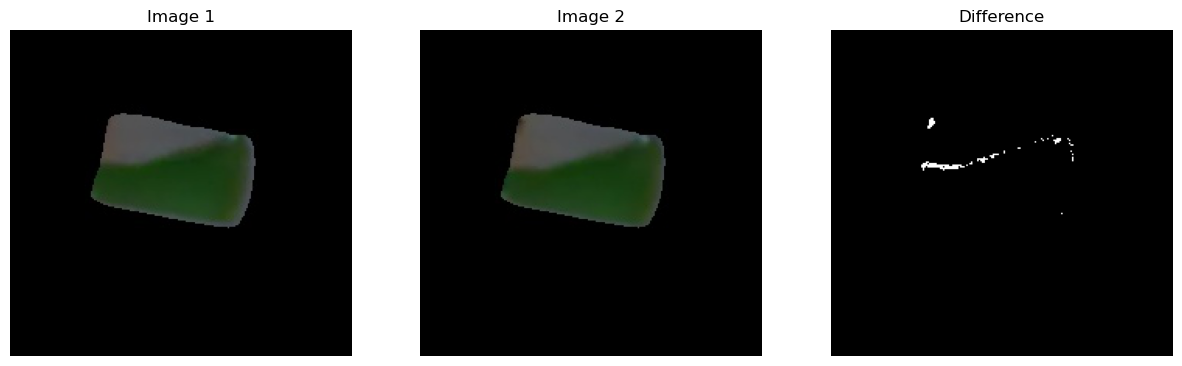

In [13]:
import sys
import os
import cv2
import os
import matplotlib.pyplot as plt

# Add path to data
data_path = os.path.normpath(os.path.abspath(os.path.join(os.path.dirname('__file__'), os.path.pardir, os.path.pardir, 'data')))
if (not (data_path in sys.path)):
    sys.path.append(data_path)
    
# Load the images
image1_path = os.path.join(data_path, "processed", "1.0_1", "masked_frame_66.jpg")
image2_path = os.path.join(data_path, "processed", "1.0_2", "masked_frame_66.jpg")
image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)

# Convert images to RGB (OpenCV loads images in BGR format)
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Subtract the images
difference = cv2.absdiff(image1, image2)

# Convert the difference image to grayscale
difference_gray = cv2.cvtColor(difference, cv2.COLOR_RGB2GRAY)

# Apply a binary threshold to the grayscale image
_, binary_difference = cv2.threshold(difference_gray, 15, 255, cv2.THRESH_BINARY)

# Display the binary difference

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Display the first image
axes[0].imshow(image1)
axes[0].set_title('Image 1')
axes[0].axis('off')

# Display the second image
axes[1].imshow(image2)
axes[1].set_title('Image 2')
axes[1].axis('off')

# Display the binary difference
axes[2].imshow(binary_difference, cmap='gray')
axes[2].set_title('Difference')
axes[2].axis('off')

plt.show()